---
description: ""
jupyter: python3
categories: [linear]
---

# Linear Regression {.unnumbered}


[A Practical Guide to Machine Learning with TensorFlow 2.0 & Keras by Vadim Karpusenko](https://frontendmasters.com/courses/practical-machine-learning/)

In [255]:
import tensorflow as tf

tf.random.uniform.__doc__

'Outputs random values from a uniform distribution.\n\n  The generated values follow a uniform distribution in the range\n  `[minval, maxval)`. The lower bound `minval` is included in the range, while\n  the upper bound `maxval` is excluded.\n\n  For floats, the default range is `[0, 1)`.  For ints, at least `maxval` must\n  be specified explicitly.\n\n  In the integer case, the random integers are slightly biased unless\n  `maxval - minval` is an exact power of two.  The bias is small for values of\n  `maxval - minval` significantly smaller than the range of the output (either\n  `2**32` or `2**64`).\n\n  Examples:\n\n  >>> tf.random.uniform(shape=[2])\n  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([..., ...], dtype=float32)>\n  >>> tf.random.uniform(shape=[], minval=-1., maxval=0.)\n  <tf.Tensor: shape=(), dtype=float32, numpy=-...>\n  >>> tf.random.uniform(shape=[], minval=5, maxval=10, dtype=tf.int64)\n  <tf.Tensor: shape=(), dtype=int64, numpy=...>\n\n  The `seed` argument 

A Tensor is an Array/ Matrix.

In [256]:
tf.random.uniform([1])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.6939484], dtype=float32)>

Transform a Tensor representation into a `numpy` representation

In [257]:
var = tf.random.uniform([1])
print(var.numpy())

[0.22036767]


Tensorflow is trying to optimise the utilisation of the hardware. Tensorflow keeps track of operations and how they're running on the GPU. Helping the most compute intesive parts - using pre built libraries for these operations instead.

In [258]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras import Model

Let's create noisy data (100 points) in form of `m * X + b = Y`:

In [259]:
def make_noisy_data(w=0.1, b=0.3, n=100):
    x = tf.random.uniform(shape=(n, ))
    noise = tf.random.normal(shape=(len(x), ), stddev=0.01)
    y = w * x + b + noise
    return x, y


In [260]:
X, Y = make_noisy_data()

In [261]:
X

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.48657072, 0.17176831, 0.21938956, 0.36745334, 0.05798638,
       0.67751   , 0.57760847, 0.8738278 , 0.88572407, 0.02748132,
       0.817448  , 0.39941168, 0.9407468 , 0.60550606, 0.17443848,
       0.20711946, 0.71620786, 0.22708344, 0.5322207 , 0.23200595,
       0.32317913, 0.23953998, 0.5441227 , 0.90151274, 0.22809005,
       0.9239464 , 0.65238607, 0.35112786, 0.13863361, 0.84289145,
       0.7850299 , 0.62042785, 0.5014287 , 0.9779576 , 0.06559253,
       0.96727073, 0.31404448, 0.8697041 , 0.4653598 , 0.37288296,
       0.3151381 , 0.75571716, 0.73676896, 0.8243098 , 0.09441626,
       0.26089752, 0.06647301, 0.9723432 , 0.29071236, 0.7548965 ,
       0.00323939, 0.04732835, 0.9694873 , 0.7357254 , 0.5757927 ,
       0.31435513, 0.34669054, 0.01069772, 0.22928381, 0.08957899,
       0.34720016, 0.4444213 , 0.6066693 , 0.6556382 , 0.48066437,
       0.9665227 , 0.248196  , 0.4280517 , 0.48154628, 0.01047492,
       0.19911

The distribution is more or less equal (uniform)

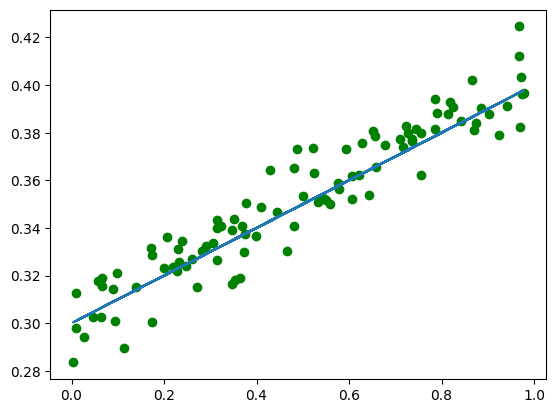

In [262]:
plt.plot(X, Y, 'go')
plt.plot(X, 0.1*X+0.3)

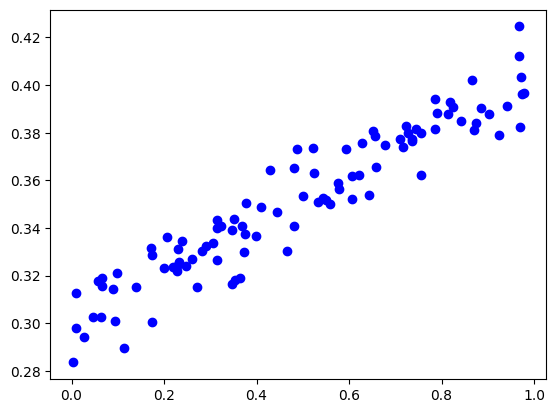

In [263]:
plt.plot(X.numpy(), Y.numpy(), "bo")

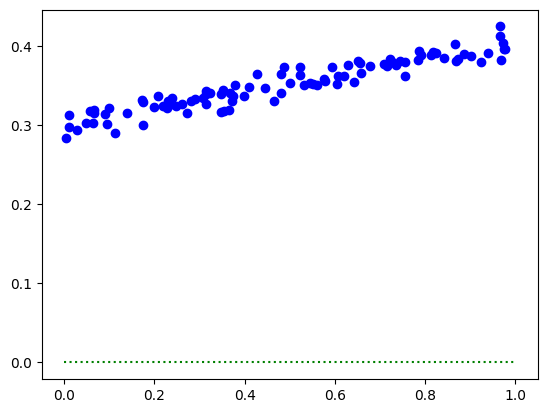

In [264]:
w = tf.Variable(0.)
b = tf.Variable(0.)
plt.plot(X.numpy(), Y.numpy(), "bo")
plt.plot([0, 1], [w*0+b, w*1+b], "g:")  # Show linear regression line according to true w=0.1, b=0.3

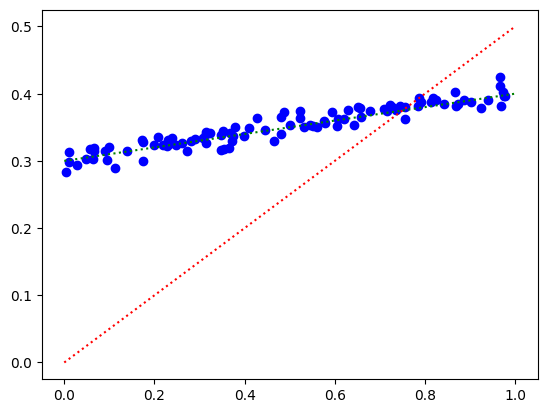

In [265]:
w_guess = 0.5
b_guess = 0.0
plt.plot(X.numpy(), Y.numpy(), "bo")
plt.plot([0, 1], [0.1*0+0.3, 0.1*1+0.3], "g:") 
plt.plot([0, 1], [0*w_guess+b_guess, 1*w_guess+b_guess], "r:")
plt.show()


The problem we are trying to solve is funding the correlation, fitting the red line to our green line.
Getting the red line to fit the optimal solution (the green line point)

We need to find the distance between our red line and the green line. We need to find our error - how far are we from correct answer.

In [266]:
def predict(x):
    y = w * x + b
    return y

Finding the loss (distance between the line and a point).

Find distance between prediction of Y and true value of Y

In [267]:
def mean_squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [268]:
loss = mean_squared_error(predict(X), Y)
print("Starting loss", loss.numpy())

Starting loss 0.124257386


The loss is significant `0.1258082`

In [269]:
w_guess = 0.1
b_guess = 0.3
print(mean_squared_error(predict(X), Y))    


tf.Tensor(0.124257386, shape=(), dtype=float32)


## Minimising the loss function

We *could* do this by hand, changing the weights and biases, twiddling them ourselves...however that would take forever! So we need an automatic solution with `differentiation`

We define the `learning_rate`. We want our steps to be quite small to prevent overshooting the `Gradient Descent` (we want to avoid jumping out of our `local minima`).

This will be an iterative method to get us close as we can.
- Calculate current loss function
- Decide what direction to move
- Move in that direction

`GradientTape()` is a Tensorflow operation where TF keeps track of mathematical operations

In [270]:
learning_rate = 0.05
steps = 200

for i in range(steps):

    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)

    gradients = tape.gradient(loss, [w, b])

    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

    if i % 20 == 0:
        print("Step %d, Loss %f" % (i, loss.numpy()))

Step 0, Loss 0.124257
Step 20, Loss 0.000795
Step 40, Loss 0.000184
Step 60, Loss 0.000162
Step 80, Loss 0.000148
Step 100, Loss 0.000137
Step 120, Loss 0.000128
Step 140, Loss 0.000121
Step 160, Loss 0.000116
Step 180, Loss 0.000112


Matching our original values makes our loss far far lower  `0.000112`. We are closer to our ideal solution.

In [271]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=0.0014718910679221153>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.000763709656894207>]

In [272]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.11502755433320999>

In [273]:
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.29490748047828674>

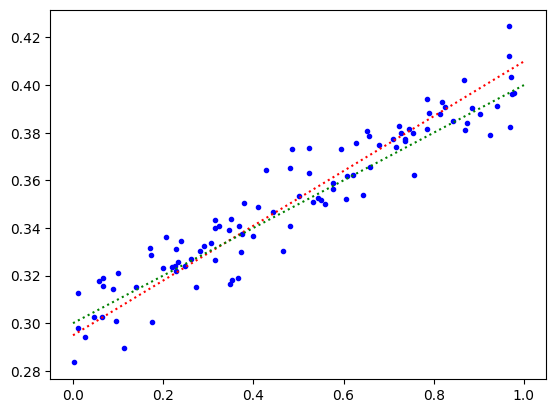

In [274]:
w_true = 0.1
b_true = 0.3
plt.plot(X, Y, "b.")
plt.plot([0, 1], [0*w+b, 1*w+b], "r:") 
plt.plot([0, 1], [0*w_true+b_true, 1*w_true+b_true], "g:")
plt.show()

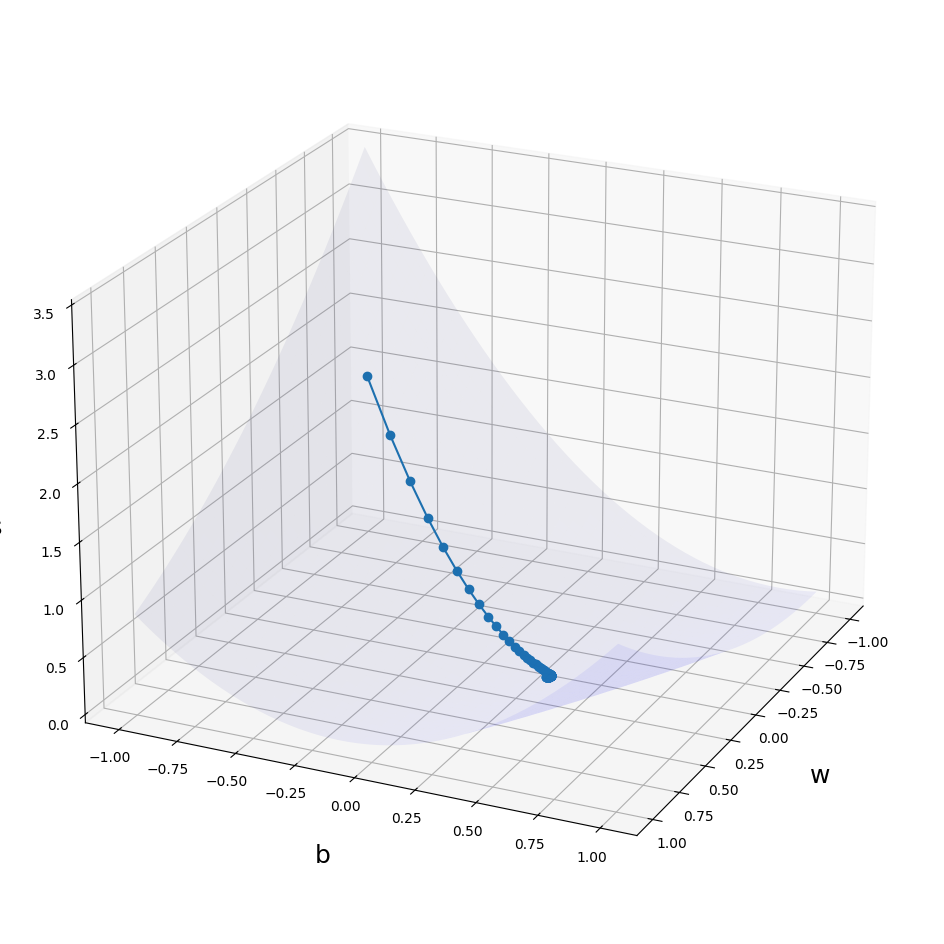

In [275]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ws = np.linspace(-1, 1)
bs = np.linspace(-1, 1)
w_mesh, b_mesh = np.meshgrid(ws, bs)


def loss_for_values(w, b):
    y = w * X + b
    loss = mean_squared_error(y, Y)
    return loss


zs = np.array([
    loss_for_values(w, b) for (w, b) in zip(np.ravel(w_mesh), np.ravel(b_mesh))
])
z_mesh = zs.reshape(w_mesh.shape)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_mesh, b_mesh, z_mesh, color='b', alpha=0.06)

w = tf.Variable(-.5)
b = tf.Variable(-.75)

history = []

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)
    gradients = tape.gradient(loss, [w, b])
    history.append((w.numpy(), b.numpy(), loss.numpy()))
    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

# Plot the trajectory
ax.plot([h[0] for h in history], [h[1] for h in history],
        [h[2] for h in history],
        marker='o')

ax.set_xlabel('w', fontsize=18, labelpad=20)
ax.set_ylabel('b', fontsize=18, labelpad=20)
ax.set_zlabel('loss', fontsize=18, labelpad=20)

ax.view_init(elev=22, azim=25)
plt.show()